In [1]:
import pandas as pd
import math
import scipy.stats as st
df = pd.read_csv("movies_metadata.csv",low_memory=False)
df = df[["title","vote_average","vote_count"]]
df.head()

,title,vote_average,vote_count
0,Toy Story,7.7,5415.0
1,Jumanji,6.9,2413.0
2,Grumpier Old Men,6.5,92.0
3,Waiting to Exhale,6.1,34.0
4,Father of the Bride Part II,5.7,173.0


In [2]:
df.shape

(45466, 3)

In [5]:
df.sort_values(by="vote_average",ascending=False).head(20)

,title,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,10.0,1.0
15710,If God Is Willing and da Creek Don't Rise,10.0,1.0
22396,Meat the Truth,10.0,1.0
22395,Marvin Hamlisch: What He Did For Love,10.0,1.0
35343,Elaine Stritch: At Liberty,10.0,1.0
186,Reckless,10.0,1.0
45047,The Human Surge,10.0,1.0
22377,The Guide,10.0,1.0
22346,هیچ کجا هیچ کس,10.0,1.0
1634,Other Voices Other Rooms,10.0,1.0


In [9]:
df["vote_count"].describe([.10,.25,.50,.7,.8,.9,.95,.99])

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
10%          1.000000
25%          3.000000
50%         10.000000
70%         25.000000
80%         50.000000
90%        160.000000
95%        434.000000
99%       2183.820000
max      14075.000000
Name: vote_count, dtype: float64

In [13]:
df.loc[df["vote_count"]>400].sort_values(by="vote_average",ascending=False)

,title,vote_average,vote_count
10309,Dilwale Dulhania Le Jayenge,9.1,661.0
40251,Your Name.,8.5,1030.0
834,The Godfather,8.5,6024.0
314,The Shawshank Redemption,8.5,8358.0
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0
...,...,...,...
1486,Speed 2: Cruise Control,4.1,439.0
28207,The Boy Next Door,4.1,1034.0
18101,Jack and Jill,4.0,619.0
21238,Sharknado,3.8,484.0


<Axes: >

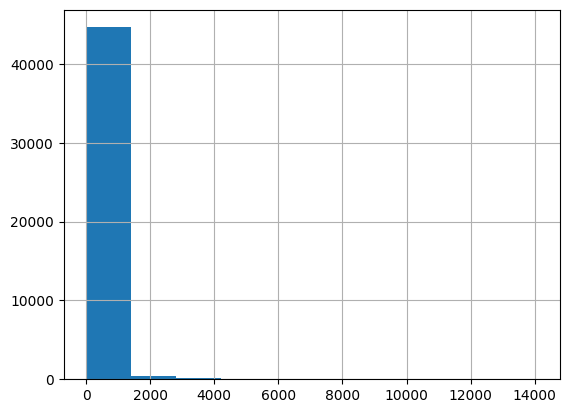

In [14]:
df["vote_count"].hist()

array([[<Axes: title={'center': 'vote_count'}>]], dtype=object)

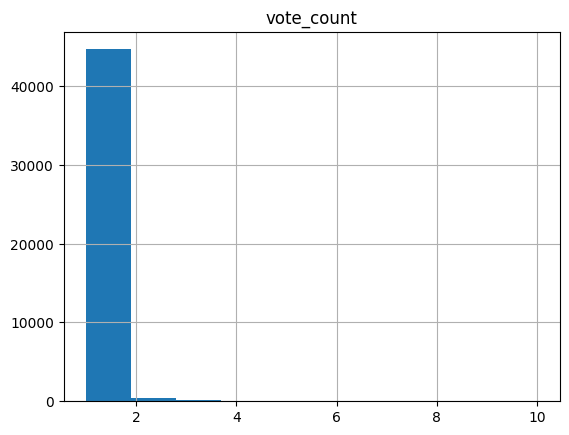

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(1,10)).set_output(transform="pandas")
sc.fit_transform(df[["vote_count"]]).hist()

In [22]:
df["vote_count_score"] = sc.fit_transform(df[["vote_count"]])

In [24]:
df["average_count_score"] = df["vote_average"] * df["vote_count_score"]
df.sort_values("average_count_score",ascending=False).head(10)

,title,vote_average,vote_count,vote_count_score,average_count_score
15480,Inception,8.1,14075.0,10.000000,81.000000
12481,The Dark Knight,8.3,12269.0,8.845187,73.415048
22879,Interstellar,8.1,11187.0,8.153321,66.041904
17818,The Avengers,7.4,12000.0,8.673179,64.181528
14551,Avatar,7.2,12114.0,8.746075,62.971737
26564,Deadpool,7.4,11444.0,8.317655,61.550650
2843,Fight Club,8.3,9678.0,7.188419,59.663879
20051,Django Unchained,7.8,10297.0,7.584227,59.156973
23753,Guardians of the Galaxy,7.9,10014.0,7.403268,58.485819
292,Pulp Fiction,8.3,8670.0,6.543872,54.314139


In [27]:
def skor(x,y):
    return x*100 +y

skor(df["vote_average"],df["vote_count"])

0        6185.0
1        3103.0
2         742.0
3         644.0
4         743.0
          ...  
45461     401.0
45462     903.0
45463     386.0
45464       0.0
45465       0.0
Length: 45466, dtype: float64

In [28]:
M = 2500
C = df["vote_average"].mean()

def weighted_rating(r,v,M,C): 
    return (v/(v+M)*r) + (M/(v+M)*C)

df["weighted_rating"] = weighted_rating(df["vote_average"],df["vote_count"],M,C)

In [30]:
df.sort_values(by="weighted_rating",ascending=False).head(10)

,title,vote_average,vote_count,vote_count_score,average_count_score,weighted_rating
12481,The Dark Knight,8.3,12269.0,8.845187,73.415048,7.846044
314,The Shawshank Redemption,8.5,8358.0,6.344369,53.927140,7.836482
2843,Fight Club,8.3,9678.0,7.188419,59.663879,7.749460
15480,Inception,8.1,14075.0,10.000000,81.000000,7.725672
292,Pulp Fiction,8.3,8670.0,6.543872,54.314139,7.699778
834,The Godfather,8.5,6024.0,4.851936,41.241456,7.654800
22879,Interstellar,8.1,11187.0,8.153321,66.041904,7.646688
351,Forrest Gump,8.2,8147.0,6.209449,50.917485,7.593775
7000,The Lord of the Rings: The Return of the King,8.1,8226.0,6.259964,50.705712,7.521547
4863,The Lord of the Rings: The Fellowship of the Ring,8.0,8892.0,6.685826,53.486607,7.477310


In [31]:
import math
import scipy.stats as st
def bayesian_average_rating(n, confidence=0.95):
    if sum(n) == 0:
        return 0
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    return score

In [32]:
df = pd.read_csv("imdb_ratings.csv")
df

,Unnamed: 0,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one
0,0,111161,1. The Shawshank Redemption (1994),9.2,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733
1,1,68646,2. The Godfather (1972),9.1,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128
2,2,71562,3. The Godfather: Part II (1974),9.0,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469
3,3,468569,4. The Dark Knight (2008),9.0,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345
4,4,50083,5. 12 Angry Men (1957),8.9,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,1454029,246. La battaglia di Algeri (1966),8.0,73464,99692,144920,72405,21568,7507,3036,1657,1207,3567
246,246,58946,247. The Help (2011),8.0,11465,11483,14496,7704,2955,1469,589,420,379,2239
247,247,2991224,248. Mandariinid (2013),8.0,11968,8630,11245,5710,1550,558,210,125,130,401
248,248,169858,249. Trois couleurs: Rouge (1994),8.0,11972,8314,8828,4494,2043,1085,586,372,342,981


In [38]:
df=df.iloc[:,1:]
df.head()

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one
0,111161,1. The Shawshank Redemption (1994),9.2,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733
1,68646,2. The Godfather (1972),9.1,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128
2,71562,3. The Godfather: Part II (1974),9.0,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469
3,468569,4. The Dark Knight (2008),9.0,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345
4,50083,5. 12 Angry Men (1957),8.9,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318


In [41]:
df.apply(lambda x:x[["one","two","three","four","five","six","seven","eight","nine","ten"]],axis=1)

,one,two,three,four,five,six,seven,eight,nine,ten
0,34733,4355,4704,6561,13515,26184,87368,273091,600284,1295382
1,37128,5879,6268,8419,16603,30016,78541,199440,402527,837932
2,20469,3892,4347,6210,12657,26349,70847,175507,324905,486356
3,30345,7173,8082,11429,23237,49483,137748,354610,649123,1034863
4,8318,1478,1723,2866,6278,15773,48341,133998,225437,246765
...,...,...,...,...,...,...,...,...,...,...
245,3567,1207,1657,3036,7507,21568,72405,144920,99692,73464
246,2239,379,420,589,1469,2955,7704,14496,11483,11465
247,401,130,125,210,558,1550,5710,11245,8630,11968
248,981,342,372,586,1085,2043,4494,8828,8314,11972


In [42]:
df["bar_score"] = df.apply(lambda x: bayesian_average_rating(x[["one","two","three","four","five","six","seven","eight","nine","ten"]]),axis=1)

In [43]:
df.sort_values("bar_score",ascending=False)

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one,bar_score
0,111161,1. The Shawshank Redemption (1994),9.2,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733,9.145389
1,68646,2. The Godfather (1972),9.1,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128,8.940016
3,468569,4. The Dark Knight (2008),9.0,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345,8.895962
2,71562,3. The Godfather: Part II (1974),9.0,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469,8.812499
4,50083,5. 12 Angry Men (1957),8.9,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318,8.767934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,15324,197. Sherlock Jr. (1924),8.1,8435,9011,12448,6343,2341,1099,476,333,394,1245,7.907524
246,58946,247. The Help (2011),8.0,11465,11483,14496,7704,2955,1469,589,420,379,2239,7.868787
237,48021,238. Du rififi chez les hommes (1955),8.0,5108,6776,8867,4252,1541,612,274,185,147,1185,7.859573
220,46268,221. Le salaire de la peur (1953),8.0,10107,12167,15950,8459,2871,1464,600,427,450,2185,7.822585
